In [1]:
!pip3 install tensorflow
!pip3 install numpy

In [2]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [5]:
#   Założenia projektu:
# -Testowany był eksperymentalny lek na osobach w wieku od 13 do 100 lat w badaniu klinicznym.
# -Badanie miało 2100 uczestników. Połowa była w wieku poniżej 65 lat, połowa 65 lat lub starsza.
# -Około 95% pacjentów w wieku 65 lat lub starszych doświadczyło skutków ubocznych.
# -Około 95% pacjentów poniżej 65 roku życia nie doświadczyło żadnych skutków ubocznych.
train_samples = []
train_labels = []

In [6]:
for i in range(50):
    # Około 5% młodych osób, które doświadczyły skutków ubocznych
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # Około 5% starszych osób, które nie doświadczyły skutków ubocznych
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # Około 95% młodych osób, które nie doświadczyły skutków ubocznych
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # Około 95% starszych osób, które doświadczyły skutków ubocznych
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

In [7]:
print(train_samples)

[46, 80, 62, 93, 35, 95, 57, 74, 61, 68, 51, 78, 26, 97, 59, 75, 49, 88, 35, 68, 48, 84, 34, 75, 62, 71, 48, 81, 33, 98, 14, 77, 61, 80, 20, 100, 25, 85, 27, 96, 32, 80, 48, 91, 33, 91, 33, 91, 44, 70, 18, 95, 18, 67, 17, 74, 41, 99, 48, 86, 22, 95, 56, 89, 23, 95, 41, 96, 61, 86, 55, 81, 39, 77, 13, 81, 49, 99, 18, 85, 54, 67, 35, 76, 17, 70, 30, 86, 40, 88, 42, 89, 45, 79, 48, 85, 28, 74, 30, 96, 23, 87, 20, 87, 40, 97, 38, 90, 46, 72, 55, 91, 44, 80, 51, 67, 39, 87, 22, 99, 33, 83, 24, 77, 62, 72, 57, 68, 30, 78, 17, 98, 33, 68, 52, 73, 45, 90, 14, 92, 20, 88, 46, 90, 38, 86, 49, 94, 41, 86, 45, 74, 26, 66, 15, 67, 63, 91, 23, 93, 64, 81, 23, 77, 58, 74, 45, 100, 31, 73, 50, 77, 62, 85, 35, 68, 61, 82, 36, 75, 41, 100, 13, 77, 15, 88, 31, 83, 19, 70, 24, 88, 64, 77, 56, 65, 37, 91, 59, 98, 37, 96, 27, 96, 45, 99, 61, 86, 41, 74, 28, 69, 50, 92, 45, 87, 64, 100, 24, 79, 59, 84, 61, 83, 51, 71, 31, 72, 54, 85, 14, 82, 30, 83, 33, 87, 22, 85, 47, 76, 36, 70, 15, 76, 56, 73, 17, 79, 27,

In [8]:
print(train_labels)

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 

In [9]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [10]:
train_labels, train_samples = shuffle(train_labels, train_samples)

In [11]:
print(train_samples)

[20 18 30 ... 65 32 48]


In [12]:
print(train_labels)

[0 0 0 ... 1 0 0]


In [13]:
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [15]:
print(scaled_train_samples)

[[0.08045977]
 [0.05747126]
 [0.1954023 ]
 ...
 [0.59770115]
 [0.2183908 ]
 [0.40229885]]


In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [20]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ---------------------------------------- 0.0/2.4 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.4 GB 5.4 MB/s eta 0:07:26
     ---------------------------------------- 0.0/2.4 GB 5.3 MB/s eta 0:07:42
     ---------------------------------------- 0.0/2.4 GB 5.1 MB/s eta 0:07:58
     ---------------------------------------- 0.0/2.4 GB 4.9 MB/s eta 0:08:17
     ---------------------------------------- 0.0/2.4 GB 5.0 MB/s eta 0:08:05
     ---------------------------------------- 0.0/2.4 GB 5.0 MB/s eta 0:08:01
     ---------------------------------------- 0.0/2.4 GB 5.0 MB/s eta 0:08:04
     ---------------------------------------- 0.0/2.4 GB 5.0 MB/s eta 0:08:02
     ---------------------------------------- 0.0/2.4 GB 4.8 MB/s eta 0:08:24
     ---------------------------------------- 0.0/2.4 GB 4.7 MB/s eta 0:08:33
     ---------------------------------------- 0.0/2.4 GB 4.9 MB/s eta 0:08:17
     -------

In [21]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("Num GPUs Available: ", len(physical_devices))
else:
    print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  0


In [22]:
model = Sequential(
    [
        Input(shape=(1,)),
        Dense(units=16, activation='relu'),
        Dense(units=32, activation='relu'),
        Dense(units=2, activation='softmax')
    ]
)

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642 (2.51 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
210/210 - 0s - 843us/step - accuracy: 0.9405 - loss: 0.2514
Epoch 2/30
210/210 - 0s - 848us/step - accuracy: 0.9438 - loss: 0.2513
Epoch 3/30
210/210 - 0s - 857us/step - accuracy: 0.9395 - loss: 0.2509
Epoch 4/30
210/210 - 0s - 843us/step - accuracy: 0.9410 - loss: 0.2506
Epoch 5/30
210/210 - 0s - 871us/step - accuracy: 0.9405 - loss: 0.2501
Epoch 6/30
210/210 - 0s - 876us/step - accuracy: 0.9395 - loss: 0.2498
Epoch 7/30
210/210 - 0s - 876us/step - accuracy: 0.9395 - loss: 0.2494
Epoch 8/30
210/210 - 0s - 862us/step - accuracy: 0.9471 - loss: 0.2490
Epoch 9/30
210/210 - 0s - 843us/step - accuracy: 0.9395 - loss: 0.2488
Epoch 10/30
210/210 - 0s - 851us/step - accuracy: 0.9429 - loss: 0.2486
Epoch 11/30
210/210 - 0s - 848us/step - accuracy: 0.9429 - loss: 0.2483
Epoch 12/30
210/210 - 0s - 886us/step - accuracy: 0.9395 - loss: 0.2477
Epoch 13/30
210/210 - 0s - 873us/step - accuracy: 0.9476 - loss: 0.2474
Epoch 14/30
210/210 - 0s - 886us/step - accuracy: 0.9395 - loss: 0.2472
E

In [28]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 0s - 2ms/step - accuracy: 0.9476 - loss: 0.2425 - val_accuracy: 0.9571 - val_loss: 0.2433
Epoch 2/30
189/189 - 0s - 1ms/step - accuracy: 0.9460 - loss: 0.2422 - val_accuracy: 0.9571 - val_loss: 0.2447
Epoch 3/30
189/189 - 0s - 1ms/step - accuracy: 0.9519 - loss: 0.2419 - val_accuracy: 0.9524 - val_loss: 0.2431
Epoch 4/30
189/189 - 0s - 1ms/step - accuracy: 0.9476 - loss: 0.2419 - val_accuracy: 0.9571 - val_loss: 0.2433
Epoch 5/30
189/189 - 0s - 1ms/step - accuracy: 0.9508 - loss: 0.2416 - val_accuracy: 0.9524 - val_loss: 0.2430
Epoch 6/30
189/189 - 0s - 1ms/step - accuracy: 0.9460 - loss: 0.2414 - val_accuracy: 0.9571 - val_loss: 0.2443
Epoch 7/30
189/189 - 0s - 1ms/step - accuracy: 0.9487 - loss: 0.2411 - val_accuracy: 0.9571 - val_loss: 0.2451
Epoch 8/30
189/189 - 0s - 1ms/step - accuracy: 0.9519 - loss: 0.2410 - val_accuracy: 0.9571 - val_loss: 0.2448
Epoch 9/30
189/189 - 0s - 1ms/step - accuracy: 0.9519 - loss: 0.2408 - val_accuracy: 0.9571 - val_loss: 0.2431
E

In [31]:
predictions = model.predict(x=scaled_train_samples, batch_size=10, verbose=0)
for i in predictions:
    print(i)

[0.95781684 0.04218314]
[0.9574324  0.04256763]
[0.95969    0.04031005]
[0.9593218  0.04067818]
[0.04302958 0.95697045]
[0.02943581 0.97056425]
[0.9583873  0.04161265]
[0.75187576 0.24812426]
[0.9593218  0.04067818]
[0.5258414  0.47415864]
[0.04727075 0.9527293 ]
[0.15140133 0.84859866]
[0.96041673 0.03958334]
[0.01235 0.98765]
[0.95969    0.04031005]
[0.01235 0.98765]
[0.9580079  0.04199216]
[0.28869635 0.7113037 ]
[0.95969    0.04031005]
[0.9535153  0.04648475]
[0.06851938 0.93148065]
[0.95066464 0.04933528]
[0.02430291 0.97569704]
[0.9579979  0.04200209]
[0.11722367 0.88277626]
[0.02430291 0.97569704]
[0.05190723 0.94809276]
[0.02674989 0.9732501 ]
[0.0569713 0.9430287]
[0.96041673 0.03958334]
[0.9574324  0.04256763]
[0.9442165 0.0557835]
[0.9583873  0.04161265]
[0.03238245 0.9676175 ]
[0.9574324  0.04256763]
[0.0149972 0.9850028]
[0.8090275  0.19097252]
[0.28869635 0.7113037 ]
[0.75187576 0.24812426]
[0.9610291  0.03897088]
[0.9535153  0.04648475]
[0.96059644 0.03940364]
[0.95969  

In [32]:
rounded_predictions = np.argmax(predictions, axis=-1)
for i in rounded_predictions:
    print(i)

0
0
0
0
1
1
0
0
0
0
1
1
0
1
0
1
0
1
0
0
1
0
1
0
1
1
1
1
1
0
0
0
0
1
0
1
0
1
0
0
0
0
0
1
1
0
0
0
0
0
0
0
1
1
0
1
0
0
1
1
1
0
0
1
1
1
0
1
0
1
0
1
0
0
0
0
0
0
1
1
0
1
1
0
0
0
1
1
0
1
0
1
1
0
1
1
0
0
1
1
0
1
1
0
1
0
0
0
0
1
0
1
1
1
0
0
0
0
1
0
0
0
1
1
0
1
1
0
0
0
1
1
1
1
0
1
0
1
0
0
1
1
0
0
0
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
0
0
1
1
0
1
1
1
0
0
0
0
1
0
1
0
1
1
1
0
0
1
1
1
1
0
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
1
1
0
0
1
0
0
0
1
1
0
0
1
1
0
1
0
1
1
1
0
1
0
0
1
1
0
0
1
1
0
1
0
0
1
0
1
0
1
1
1
1
1
0
0
0
0
1
1
1
0
0
1
0
0
0
1
0
1
0
0
0
0
0
1
0
0
1
0
0
1
0
1
0
1
0
0
1
1
1
1
1
0
1
1
1
1
1
0
1
0
0
0
1
0
0
0
1
0
0
1
1
0
0
1
1
0
0
1
1
0
0
1
1
1
0
0
0
0
1
0
0
0
1
0
0
1
0
0
1
1
1
1
1
0
0
0
0
1
0
0
0
0
0
1
1
1
0
1
1
0
1
1
1
0
0
1
0
0
1
1
1
1
0
0
0
0
1
0
1
1
1
1
0
1
0
1
1
1
0
1
1
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
1
0
1
0
0
0
0
1
0
1
0
1
0
0
1
1
0
1
0
0
1
1
0
0
0
0
1
0
1
0
0
1
1
0
1
0
1
1
1
1
0
1
1
0
0
0
1
0
0
1
0
1
1
1
1
0
1
1
1
0
1
0
0
0
1
0
1
0
1
1
1
1
0
0
0
0
0
1
1
1
1
0
1
1
0
0
1
0
0
0
1
0
1
0
0
1
1
1
0


In [33]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=train_labels, y_pred=rounded_predictions)

In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Macierz pomyłek',
                          cmap=plt.cm.Blues):


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Znormalizowana macierz pomyłek")
    else:
        print('Macierz pomyłek, bez normalizacji')
    
    print(cm)
    
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('Prawdziwa etykieta')
    plt.xlabel('Przewidziana etykieta')

In [35]:
cm_plot_labels = ['brak efektów ubocznych', 'wystąpiły efekty uboczne']

Znormalizowana macierz pomyłek
[[0.95238095 0.04761905]
 [0.04761905 0.95238095]]


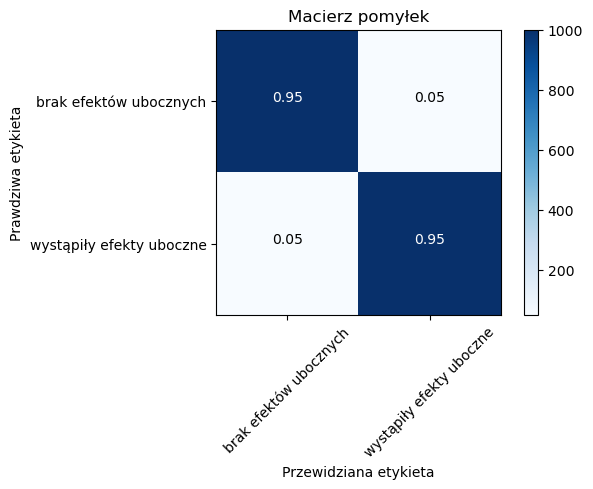

In [36]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, normalize=True, title='Macierz pomyłek')

In [37]:
import os.path
model.save('models/Dawid_Zdrojewski_AI.h5')
model.save('models/Dawid_Zdrojewski_AI.keras')